# Site exploration with Sentinel-2 data

Jason MacDonald  
UW Geospatial Data Analysis  
CEE467/CEWA567  
credit to: David Shean  

## Access images

In [1]:
import os
import urllib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import rasterio as rio
import rasterio.plot

In [3]:
#Useful package to add dynamic scalebar to matplotlib images
from matplotlib_scalebar.scalebar import ScaleBar

In [4]:
!pip install earthaccess

In [5]:
import earthaccess

auth = earthaccess.login(strategy="netrc")
if not auth:
    auth = earthaccess.login(strategy="interactive", persist=True)
# run single line below first time
#auth = earthaccess.login(strategy="interactive", persist=True)

You're now authenticated with NASA Earthdata Login
Using token with expiration date: 05/10/2023
Using .netrc file for EDL


In [6]:
#May want to use interactive plotting for zoom/pan and live coordinate display
#%matplotlib widget
#%matplotlib inline

In [7]:
pwd

'/home/jovyan/project/chelanigans'

In [8]:
notebook = 'chelan_1_site-exploration_2021'
path = '/home/jovyan/project/chelanigans/output/%s' %notebook
isExist = os.path.exists(path)
if not isExist:

   # Create a new directory because it does not exist
   os.makedirs(path)

In [9]:
#Set path to local directory with downloaded images

imgdir = '/home/jovyan/project/chelanigans/data_sample'

In [10]:
## Pre-identified cloud-free Image IDs used for the lab
# PNW 2021 heatwave June 26 - July 2

#pre-heatwave 

#date_1 = 'April 17, 2021'  #SENTINEL
#img_id1 = 'HLS.S30.T10UFU.2021107T185909.v2.0'
#date_1 = April 20, 2021 
#img_id1 = 'HLS.L30.T10UFU.2021110T185454.v2.0' #landsat
#date_1 = 'May 22, 2021'
#img_id1 = 'HLS.S30.T10UFU.2021142T185921.v2.0'
date_1 = 'June 1st, 2021'
img_id1 = 'HLS.S30.T10UFU.2021152T185921.v2.0'

#post-heatwave 

#date_2 = 'July 6th, 2021'
#img_id2 = 'HLS.S30.T10UFU.2021187T185919.v2.0'
#date_2 = 'July 11th, 2021'
#img_id2 = 'HLS.S30.T10UFU.2021192T185921.v2.0'
#date_2 = 'July 18th, 2021'
#img_id2 = 'HLS.L30.T10UFU.2021199T184900.v2.0' #landsat
#date_2 = July 25th, 2021 
#img_id2 = 'HLS.L30.T10UFU.2021206T185515.v2.0' #landsat
date_2 = 'September 24th, 2021'
img_id2 = 'HLS.S30.T10UFU.2021267T190029.v2.0'


In [11]:
#Define image to use (can set this to switch to pre/post heatwave image
date = date_2
img = img_id2

In [12]:
#Scale and offset values for L2 Landsat products

# are these same/similar for Sentinel-2?
# check metadata for values

#Surface Reflectance 0.0000275 + -0.2
sr_scale = 0.0000275
sr_offset = -0.2
#Surface Temperature 0.00341802 + 149.0
st_scale = 0.00341802
st_offset = 149.0

In [13]:
#Specify filenames for different bands

r_fn = os.path.join(imgdir, img+'.B04.tif') #Red
g_fn = os.path.join(imgdir, img+'.B03.tif') #Green
b_fn = os.path.join(imgdir, img+'.B02.tif') #Blue
nir_fn = os.path.join(imgdir, img+'.B08.tif') #Near-Infrared (NIR08)
swir_fn = os.path.join(imgdir, img+'.B11.tif') #Shortwave-Infrared (SWIR16)

### Fetch Panchromatic band from Google Cloud archive (not available from MS Planetary Computer)

In [14]:
#Sentinel-2
base_url = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020'
#full_url = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021362T190811.v2.0/HLS.S30.T10UFU.2021362T190811.v2.0.B02.tif'

#landsat
#base_url = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020'  
#full_url = 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T10UFU.2022001T185530.v2.0/HLS.L30.T10UFU.2022001T185530.v2.0.B02.tif'

img_list = (img_id2, img_id1)
band_list = ('02', '03', '04', '08', '11') 

#Loop through all selected images and bands
for img in img_list:
    for b in band_list:
    #Generate the appropriate URL for the images we identified
        image_url =  '{0}/{1}/{1}.B{2}.tif'.format(base_url, img, b)    
        print(image_url)
    #Local filename
        out_fn = os.path.join(imgdir, os.path.split(image_url)[-1])
    #Check to see if file already exists
    if not os.path.exists(out_fn):
        print("Saving:", out_fn)
        
        
        
        #Download the file
        #figure out authorization here
        urllib.request.urlretrieve(image_url, out_fn)

https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B02.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B03.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B04.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B08.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021267T190029.v2.0/HLS.S30.T10UFU.2021267T190029.v2.0.B11.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.2021152T185921.v2.0/HLS.S30.T10UFU.2021152T185921.v2.0.B02.tif
https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T10UFU.202115

In [15]:
#Sanity check
#Leave this Dataset open for use later in lab (e.g., extracting resolution)
r_src = rio.open(r_fn)
print("MS", r_src.profile)

MS {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 3660, 'height': 3660, 'count': 1, 'crs': CRS.from_wkt('PROJCS["UTM Zone 10, Northern Hemisphere",GEOGCS["Unknown datum based upon the WGS 84 ellipsoid",DATUM["Not specified (based on WGS 84 spheroid)",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(30.0, 0.0, 600000.0,
       0.0, -30.0, 5400000.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


## Raster window extraction
* Instead of array indexing, we can use the built-in `rasterio.windows.Window` functionality
    * This is really valuable when you only want to load a small portion of a large dataset that is too big to fit into available RAM
        * With array indexing, we must load the entire array into memory and then extract the desired window
        * With the rasterio window, we never have to load the full array
    * https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html
    * Syntax is `rasterio.windows.Window(col_offset, row_offset, width, height)`
* Let's define 1024x1024 px windows around Mt. Rainer and Seattle

In [16]:
import rasterio.windows

#Lake Chelan
#window = rasterio.windows.Window(1750, 1000, 2048, 2048)
window = rasterio.windows.Window(2400, 1500, 512, 1024)
#window = rasterio.windows.Window(2250, 1500, 512, 512)

In [17]:
#Define window bounds
window_bounds = rasterio.windows.bounds(window, r_src.transform)
print("Window bounds: ", window_bounds)
#Define window extent
window_extent = [window_bounds[0], window_bounds[2], window_bounds[1], window_bounds[3]]
print("Window extent: ", window_extent)

Window bounds:  (672000.0, 5324280.0, 687360.0, 5355000.0)
Window extent:  [672000.0, 687360.0, 5324280.0, 5355000.0]


### Function to read only this subwindow into an array

In [18]:
def rio2ma(fn, b=1, window=None, scale=True):
    with rio.open(fn) as src:
        #Read in the window to masked array
        a = src.read(b, window=window, masked=True)
        #If Level 2 surface reflectance and surface temperature, scale values appropriately
        if scale:
            if 'SR' in fn:
                #Output in unitless surface reflectance from 0-1
                a = a * sr_scale + sr_offset
            elif 'ST' in fn:
                #Output in degrees Celsius
                a = a * st_scale + st_offset - 273.15
            a = a.astype('float32')
        return a

### Function to normalize (AKA contrast stretch) input image array values
* The input image pixel values are `UInt16` (unsigned, 16-bit integer, spanning the range 0-65535)
* We want to rescale to `float` values over the range (0.0-1.0)

In [19]:
def normie(data, low_perc, up_perc):
    perc = np.percentile(data.compressed(), (low_perc, up_perc)) #default (2, 98)
    normd = (data - perc[0])/(perc[1] - perc[0])
    clipd = np.clip(normd, 0, 1)
    return clipd

## Natural "true-color" RGB (red, green, blue) composite for this window
* This represents "true" color, closer to what your eye would see
* Use the `rio2ma` function to load the same window from the red, green and blue band tif files
    * ⚠️ Make sure you pass in the window, and don't try to load the full images here!  Can potentially fill RAM on your Jupyterhub server, leading to kernel restart!
* Then normalize each channel independently using your `norm` function
    * Note: the surface reflectance values for Bands 1-7 (visible and near-IR) should already be scaled from 0.0-1.0 due to scaling in the original `rio2ma` function at the beginning of the notebook

In [20]:
# load window from red, green, blue tif files
mr_r = rio2ma(r_fn, b=1, window=window, scale=True)
mr_g = rio2ma(g_fn, b=1, window=window, scale=True)
mr_b = rio2ma(b_fn, b=1, window=window, scale=True)

r = normie(mr_r, 2, 98)
g = normie(mr_g, 2, 98)
b = normie(mr_b, 2, 98)

fin = np.dstack((r,g,b))
fin.shape

(1024, 512, 3)

### Plot the natural color composite

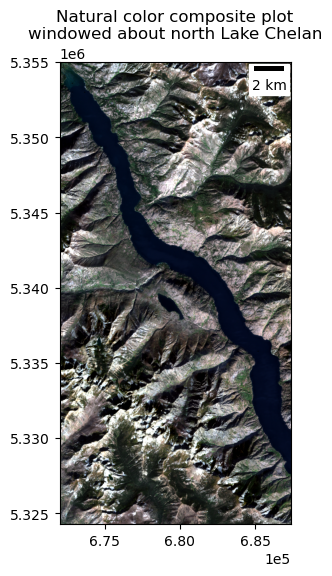

In [21]:
fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(fin, cmap='gray', extent=window_extent)

ax.add_artist(ScaleBar(1.0))
ax.ticklabel_format(scilimits=(1,3))
ax.set_title('Natural color composite plot'+'\n'+'windowed about north Lake Chelan')
plt.show();

In [22]:
#%matplotlib widget

### Color-infrared (CIR) composite plot
* http://gsp.humboldt.edu/olm/Courses/GSP_216/lessons/composites.html
* Sanity check: vegetation should appear red
    * Deciduous (leafy) vegetation will appear bright red
    * Coniferous (evergreen) vegetation will appear darker red

In [23]:
# load window from near infrared tif file and normalize
mr_nir = rio2ma(nir_fn, b=1, window=window, scale=True)
nir = normie(mr_nir, 2, 98)

# stack bands in proper order
fin_cir = np.dstack((nir,r,g))
#check shape for sanity
fin_cir.shape

(1024, 512, 3)

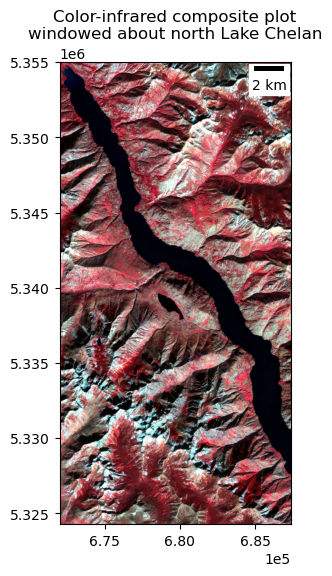

In [24]:
fig, ax = plt.subplots(figsize=(4,6))

ax.imshow(fin_cir, extent=window_extent)

ax.add_artist(ScaleBar(1.0))
ax.ticklabel_format(scilimits=(1,3))
ax.set_title('Color-infrared composite plot'+'\n'+'windowed about north Lake Chelan')
plt.show();

In [25]:
#%matplotlib widget
%matplotlib inline

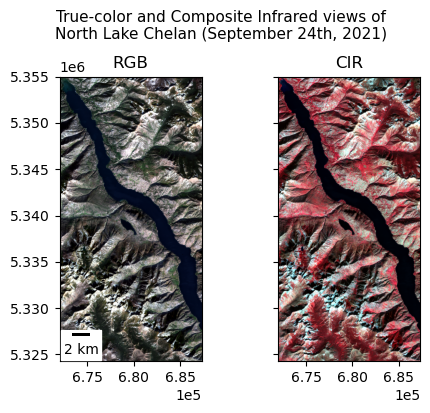

In [26]:
fig, axa = plt.subplots(1, 2, figsize=(5,4), sharex=True, sharey=True)
fig.suptitle('True-color and Composite Infrared views of'+'\n'+'North Lake Chelan (%s)' %date[::],
             fontsize=11,
             y=1)    

axa[0].imshow(fin, extent=window_extent)
axa[0].set_title('RGB')
axa[0].ticklabel_format(scilimits=(1,3))

axa[0].add_artist(ScaleBar(1.0, location='lower left'))

axa[1].imshow(fin_cir, extent=window_extent)
axa[1].set_title('CIR')
axa[1].ticklabel_format(scilimits=(1,3))

fig.tight_layout(pad=0.5)
plt.show();

## Raster band math and index ratios
* Let's use some common band ratios to classify vegetation, snow and water for our window
* NOTE: if you're using `UInt16` masked arrays here, you will want to first convert each to `float`, as some addition/subtraction operations could result in values outside of 0-65536 (e.g., areas that are bright in all visible bands, like snow).
    * Can use `myarray.astype(float)` for this
    * If you don't do this, you will end up with "wrapping" artifacts

### NDSI (normalized difference snow index)
* There are multiple definitions of NDSI in the literature, but let's use this one (using SWIR, since we have it available with Sentinel-2 and Landsat-8):
    * https://eos.com/ndsi/

In [27]:
swir = rio2ma(swir_fn, b=1, window=window, scale=True)
g = rio2ma(g_fn, b=1, window=window, scale=True)

ndsi = (g - swir) / (g + swir)

In [28]:
ndsi = np.ma.clip(ndsi, -1, 1)
type(ndsi)

numpy.ma.core.MaskedArray

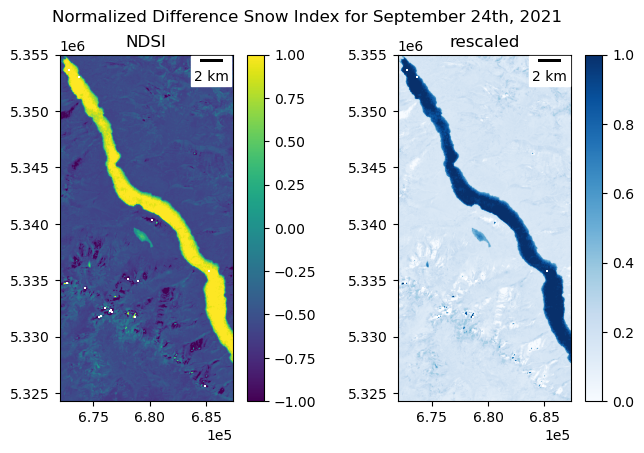

In [29]:
fig, axa = plt.subplots(1, 2, figsize=(8,4.5))

shw0 = axa[0].imshow(ndsi, cmap='viridis', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0))
axa[0].set_title('NDSI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(normie(ndsi, 2, 98), cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw1)
axa[1].add_artist(ScaleBar(1.0))
axa[1].set_title('rescaled')
axa[1].ticklabel_format(scilimits=(1,3))

fig.suptitle('Normalized Difference Snow Index for %s' %date)
plt.show();

### NDWI (normalized difference water index)
* Again, multiple definitions for different sensors.  Let's use the formula for surface water bodies (not leaves):
    * https://en.wikipedia.org/wiki/Normalized_difference_water_index


In [30]:
#nir = rio2ma(nir_fn, b=1, window=window, scale=True)
#g = rio2ma(g_fn, b=1, window=window, scale=True)
ndwi = (g - nir) / (g + nir)
ndwi = np.ma.clip(ndwi, -1, 1)

### NDSSI (normalized difference suspended sediment index)
[11] Hossain et al


In [31]:
#nir = rio2ma(nir_fn, b=1, window=window, scale=True)
#g = rio2ma(g_fn, b=1, window=window, scale=True)
ndssi = (b - nir) / (b + nir)
ndssi = np.ma.clip(ndssi, -1, 1)

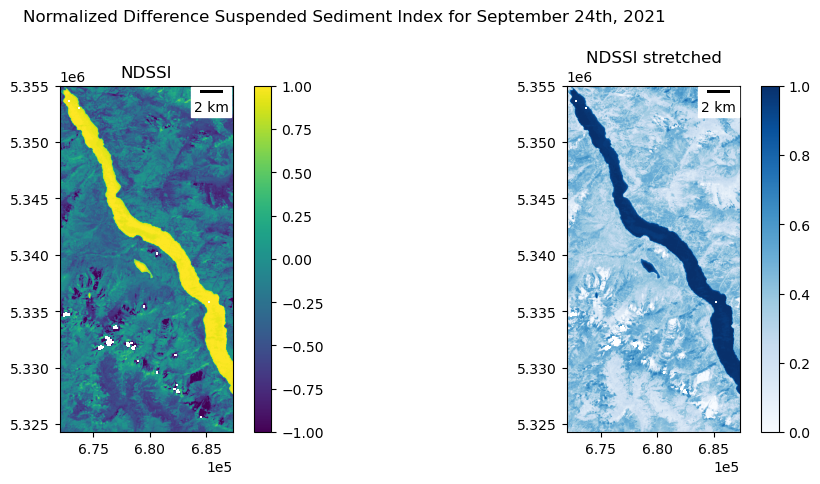

In [32]:
fig, axa = plt.subplots(1, 2, figsize=(12,4.5))

shw0 = axa[0].imshow(ndssi, cmap='viridis', extent=window_extent)
bar = plt.colorbar(shw0)
axa[0].add_artist(ScaleBar(1.0))
axa[0].set_title('NDSSI')
axa[0].ticklabel_format(scilimits=(1,3))

shw1 = axa[1].imshow(normie(ndssi, 2, 98), cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw1)
axa[1].add_artist(ScaleBar(1.0))
axa[1].set_title('NDSSI stretched')
axa[1].ticklabel_format(scilimits=(1,3))

fig.suptitle('Normalized Difference Suspended Sediment Index for %s' %date, y=1.05)

plt.show();

### NDTI (normalized difference turbidity index)
[4] C. Baughman et al


In [33]:
#%matplotlib widget
%matplotlib inline

In [34]:
#nir = rio2ma(nir_fn, b=1, window=window, scale=True)
#g = rio2ma(g_fn, b=1, window=window, scale=True)
ndti = (r - g) / (r + g)
ndti = np.ma.clip(ndti, -1, 1)

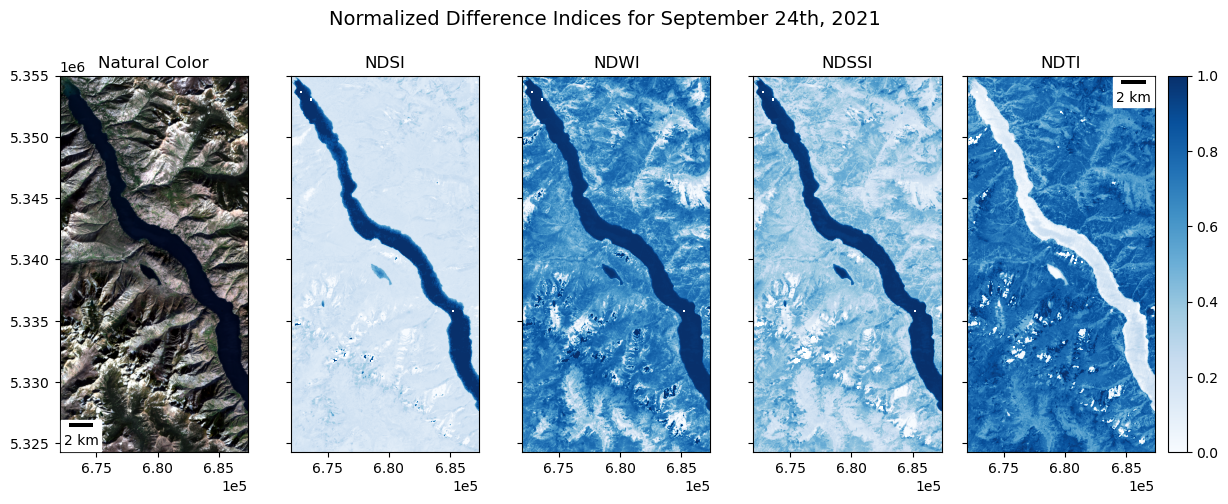

In [35]:
fig, axa = plt.subplots(1, 5, figsize=(12,4), sharex=True, sharey=True)

axa[0].imshow(fin, cmap='gray', extent=window_extent)
axa[0].set_title('Natural Color')
axa[0].ticklabel_format(scilimits=(1,3))
axa[0].add_artist(ScaleBar(1.0, location='lower left'))

axa[1].imshow(normie(ndsi, 2, 98), cmap='Blues', extent=window_extent)
axa[1].set_title('NDSI')
axa[1].ticklabel_format(scilimits=(1,3))

axa[2].imshow(normie(ndwi, 2, 98), cmap='Blues', extent=window_extent)
axa[2].set_title('NDWI')
axa[2].ticklabel_format(scilimits=(1,3))

axa[3].imshow(normie(ndssi, 2, 98), cmap='Blues', extent=window_extent)
axa[3].set_title('NDSSI') #Hossain et al
axa[3].ticklabel_format(scilimits=(1,3))

shw1 = axa[4].imshow(normie(ndti, 2, 98), cmap='Blues', extent=window_extent)
bar = plt.colorbar(shw1)
axa[4].add_artist(ScaleBar(1.0))
axa[4].set_title('NDTI') #Baughman et al
axa[4].ticklabel_format(scilimits=(1,3))

fig.suptitle('Normalized Difference Indices for %s' %date, y=1.15, fontsize=14)
fig.tight_layout(pad=-1.75)
plt.locator_params(axis='x', nbins=4)
plt.show();